In [14]:
library(readxl)
library(lmtest)
library(zoo)
library(sandwich)
library(car)
library(e1071)

In [5]:
df<-read_excel("VHLSS2014_HN.xlsx")
df

Year,province,area,size,income,rice,nrice,tobaco,nfood,edu,med,hins,aid,water,elec,garb,fuel
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2014,1,1,2,194300,5130.8,67936.3,350,33222.00,0,8232,0,0,780,7800,144,9480
2014,1,1,2,67330,4114.4,40388.7,51,37839.00,4790,1042,292,0,600,9000,144,7200
2014,1,1,5,592600,3413.7,194538.2,350,184893.16,7340,3020,580,0,440,12600,360,37680
2014,1,1,3,254500,2948.0,62885.9,50,30745.00,7400,2690,290,2000,1320,7200,144,5040
2014,1,1,2,234000,4001.0,62819.1,60,78075.67,0,971,621,0,720,10200,144,14400
2014,1,1,5,346160,4547.0,93430.2,20,58144.17,17900,31971,621,5000,1200,12000,216,12600
2014,1,1,4,63030,2532.0,57927.0,1419,20539.83,4710,28678,278,5000,1200,4200,288,3600
2014,1,1,5,160600,4341.5,121118.9,2945,43642.34,18475,2168,898,0,960,9600,288,7800
2014,1,1,4,75460,3673.0,56753.8,30,24914.17,0,4130,1000,0,1200,9600,288,3600


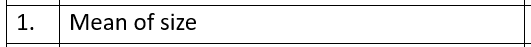

In [6]:
mean(df$size)

[1] 4.109524

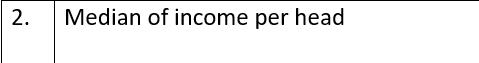

In [9]:
median(df$income/df$size)

[1] 35554.17

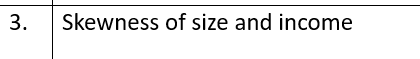

In [16]:
skewness(df$size)

[1] 0.1771886

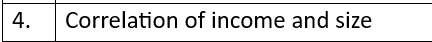

In [17]:
cor(df$income,df$size)

[1] 0.3397698

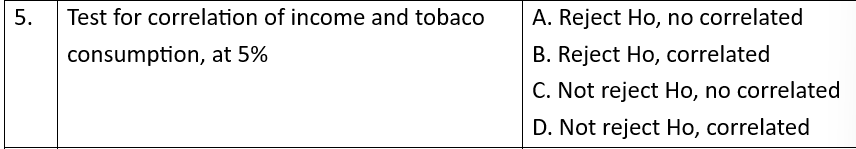

In [18]:
cor.test(df$income,df$tobaco)


	Pearson's product-moment correlation

data:  df$income and df$tobaco
t = 4.1995, df = 418, p-value = 3.272e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1075875 0.2912808
sample estimates:
      cor 
0.2012024 


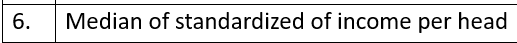

In [20]:
inh<-df$income/df$size
standardized<-(inh-mean(inh))/sd(inh)
median(standardized)

[1] -0.2526604

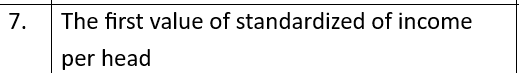

In [25]:
print(standardized[1])

[1] 1.307468


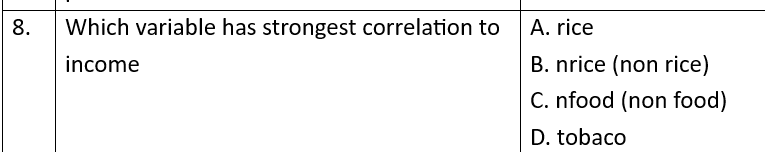

In [26]:
cor(df)

Warning message in cor(df):
"the standard deviation is zero"


,Year,province,area,size,income,rice,nrice,tobaco,nfood,edu,med,hins,aid,water,elec,garb,fuel
Year,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
province,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
area,NA,NA,1.000000000,0.003122652,-0.49647946,0.06148913,-0.5202258,-0.09576874,-0.46177373,-0.17317859,-0.17183156,0.02608187,-0.07261223,-0.46079190,-0.51087179,-0.47093863,NA
size,NA,NA,0.003122652,1.000000000,0.33976979,0.63644546,0.4603220,0.27312462,0.27928027,0.19426687,0.10723192,0.29325328,0.02349344,0.15238830,0.27653368,0.41044759,NA
income,NA,NA,-0.496479463,0.339769787,1.00000000,0.21249575,0.7408187,0.20120240,0.72809014,0.31742600,0.22398210,0.07069214,0.11908652,0.41514512,0.68279526,0.48296349,NA
rice,NA,NA,0.061489131,0.636445463,0.21249575,1.00000000,0.2921958,0.23334701,0.16274530,0.16334412,0.03087888,0.21680374,0.03035594,0.10902845,0.19998001,0.20305795,NA
nrice,NA,NA,-0.520225802,0.460322019,0.74081866,0.29219582,1.0000000,0.27523645,0.70886637,0.31895934,0.24104505,0.13920648,0.11529106,0.40701658,0.61325922,0.53128448,NA
tobaco,NA,NA,-0.095768739,0.273124616,0.20120240,0.23334701,0.2752365,1.00000000,0.16459691,0.15087390,0.01457464,0.02164172,0.04240407,0.12707735,0.19205729,0.14370752,NA
nfood,NA,NA,-0.461773729,0.279280270,0.72809014,0.16274530,0.7088664,0.16459691,1.00000000,0.26661819,0.17675782,0.08761537,0.10753368,0.38866903,0.60881404,0.39703548,NA
edu,NA,NA,-0.173178588,0.194266868,0.31742600,0.16334412,0.3189593,0.15087390,0.26661819,1.00000000,0.04695826,0.23733646,0.01654505,0.18233926,0.30939554,0.23094790,NA


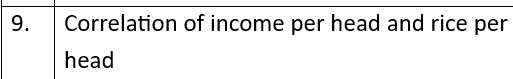

In [27]:
rh<-df$rice/df$size
srh<-(rh-mean(rh))/sd(rh)
cor(inh,rh)

[1] 0.2207207

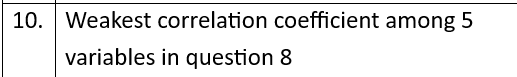

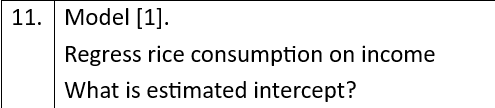

In [29]:
reg1<-lm(data=df,rice~income)
summary(reg1)


Call:
lm(formula = rice ~ income, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5448.6 -1815.5  -314.8  1366.9 21390.0 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.608e+03  2.262e+02  20.367  < 2e-16 ***
income      4.708e-03  1.059e-03   4.446 1.12e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2677 on 418 degrees of freedom
Multiple R-squared:  0.04515,	Adjusted R-squared:  0.04287 
F-statistic: 19.77 on 1 and 418 DF,  p-value: 1.122e-05


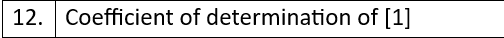

In [30]:
summary(reg1)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4.607527e+03,2.262272e+02,20.366814,1.490953e-64
income,4.707689e-03,1.058854e-03,4.446024,1.122359e-05


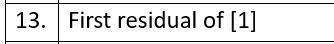

In [33]:
summary(reg1)$resid[1]

1 
-391.4314

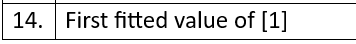

In [37]:
predict(reg1)[1]

1 
5522.231

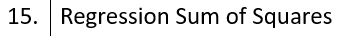

Chắc là RSS -> 2677

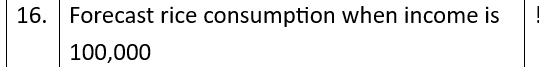

In [40]:
predict(reg1,data.frame(income=100000))

1 
5078.296

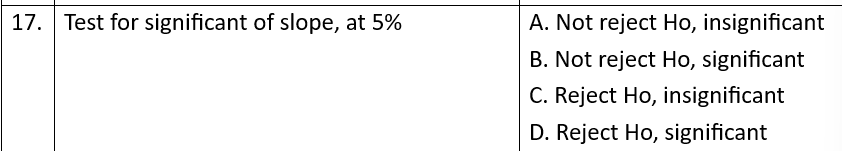

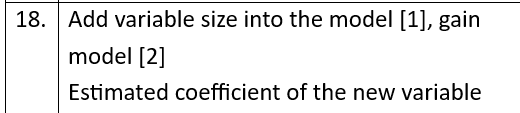

In [42]:
reg2<-lm(data=df,rice~income+size)
summary(reg2)


Call:
lm(formula = rice ~ income + size, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-7217.0 -1157.5  -270.5   915.6 20671.4 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.946e+02  2.943e+02   3.040  0.00252 ** 
income      -9.390e-05  8.897e-04  -0.106  0.91600    
size         1.107e+03  6.972e+01  15.883  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2115 on 417 degrees of freedom
Multiple R-squared:  0.4051,	Adjusted R-squared:  0.4022 
F-statistic:   142 on 2 and 417 DF,  p-value: < 2.2e-16


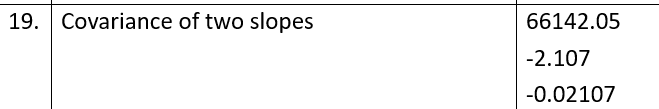

In [43]:
vcov(reg2)

,(Intercept),income,size
(Intercept),8.660847e+04,-5.148315e-02,-1.629683e+04
income,-5.148315e-02,7.916130e-07,-2.107511e-02
size,-1.629683e+04,-2.107511e-02,4.860233e+03


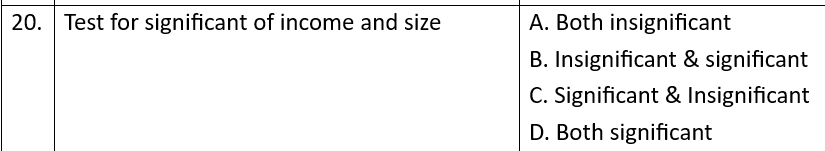

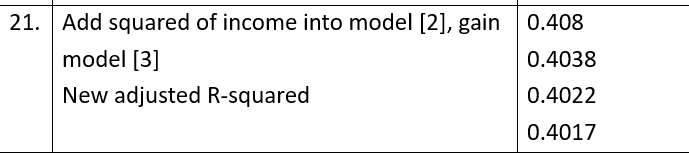

In [44]:
reg3<-lm(data=df,rice~ I(income^2) + income + size)
summary(reg3)


Call:
lm(formula = rice ~ I(income^2) + income + size, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-7185.8 -1158.2  -291.4   948.5 20616.6 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.054e+02  3.155e+02   2.553    0.011 *  
I(income^2) -2.692e-09  3.426e-09  -0.786    0.432    
income       1.505e-03  2.220e-03   0.678    0.498    
size         1.091e+03  7.275e+01  14.997   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2116 on 416 degrees of freedom
Multiple R-squared:  0.406,	Adjusted R-squared:  0.4017 
F-statistic: 94.76 on 3 and 416 DF,  p-value: < 2.2e-16


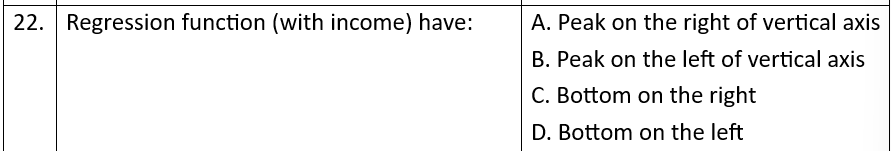

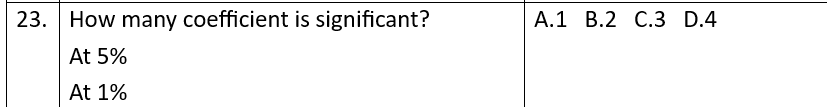

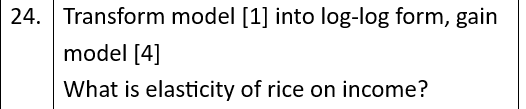

In [45]:
reg4<-lm(data=df,log(rice)~log(income))
summary(reg4)


Call:
lm(formula = log(rice) ~ log(income), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9343 -0.2921  0.0722  0.3492  1.6035 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.16703    0.43206   11.96  < 2e-16 ***
log(income)  0.27830    0.03648    7.63 1.61e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5687 on 418 degrees of freedom
Multiple R-squared:  0.1222,	Adjusted R-squared:  0.1201 
F-statistic: 58.21 on 1 and 418 DF,  p-value: 1.607e-13


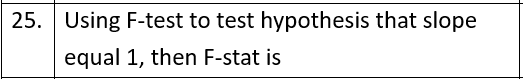

In [46]:
linearHypothesis(reg4, "log(income) = 1")

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,419,261.8004,NA,NA,NA,NA
2,418,135.1922,1,126.6082,391.4593,5.765484e-62


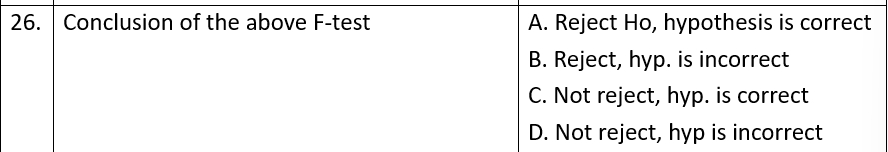

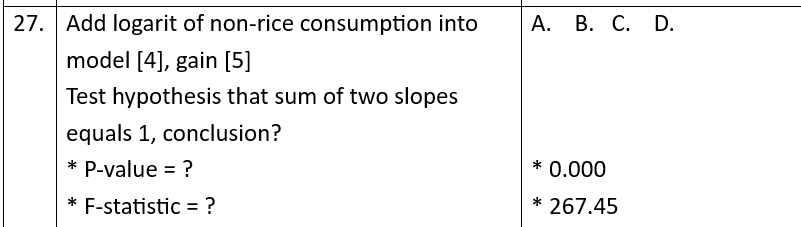

In [49]:
reg5<-lm(data=df,log(rice)~log(income)+ log(nrice))
summary(reg5)


Call:
lm(formula = log(rice) ~ log(income) + log(nrice), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9171 -0.2816  0.0437  0.3495  1.7296 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.66994    0.44673  10.454  < 2e-16 ***
log(income)  0.08168    0.06447   1.267  0.20591    
log(nrice)   0.26214    0.07136   3.674  0.00027 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5604 on 417 degrees of freedom
Multiple R-squared:  0.1498,	Adjusted R-squared:  0.1457 
F-statistic: 36.72 on 2 and 417 DF,  p-value: 2.042e-15


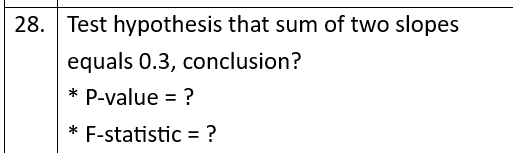

In [51]:
linearHypothesis(reg5, "log(income) + log(nrice) = 0.3")

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,418,131.3286,NA,NA,NA,NA
2,417,130.9541,1,0.3744564,1.192389,0.2754786


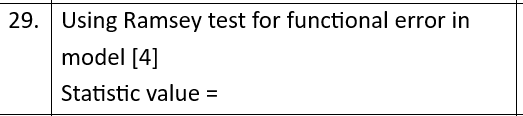

In [52]:
resettest(reg4)


	RESET test

data:  reg4
RESET = 4.7347, df1 = 2, df2 = 416, p-value = 0.009264


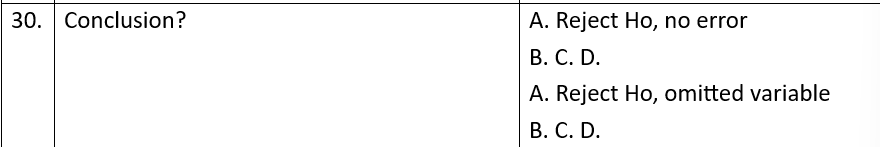

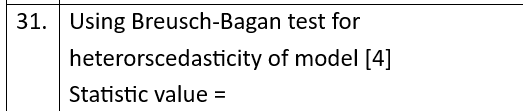

In [53]:
bptest(reg4)


	studentized Breusch-Pagan test

data:  reg4
BP = 0.17993, df = 1, p-value = 0.6714


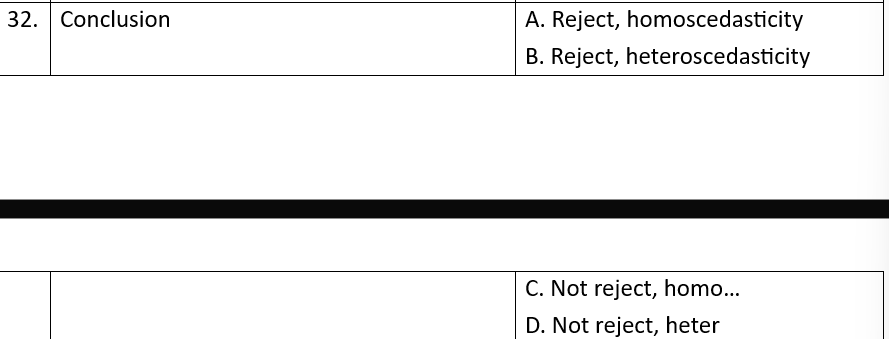

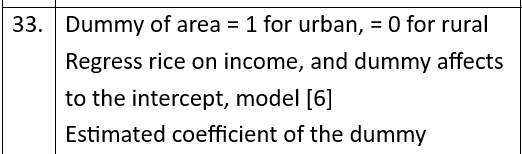

In [55]:
df$d<-2-df$area

In [57]:
reg6<-lm(data=df,rice~income+d)
summary(reg6)


Call:
lm(formula = rice ~ income + d, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6070.5 -1738.7  -293.5  1335.5 20698.4 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.738e+03  2.243e+02  21.120  < 2e-16 ***
income       7.145e-03  1.197e-03   5.967 5.15e-09 ***
d           -1.216e+03  2.965e+02  -4.100 4.96e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2628 on 417 degrees of freedom
Multiple R-squared:  0.08216,	Adjusted R-squared:  0.07776 
F-statistic: 18.66 on 2 and 417 DF,  p-value: 1.725e-08


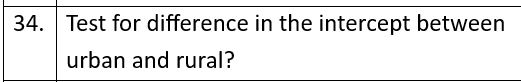

In [59]:
reg7<-lm(data=df,rice~d)
summary(reg7)


Call:
lm(formula = rice ~ d, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5498.0 -1697.3  -333.3  1281.6 21498.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5583.0      181.1   30.83   <2e-16 ***
d             -337.3      267.8   -1.26    0.209    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2734 on 418 degrees of freedom
Multiple R-squared:  0.003781,	Adjusted R-squared:  0.001398 
F-statistic: 1.586 on 1 and 418 DF,  p-value: 0.2085


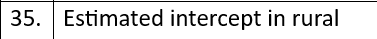

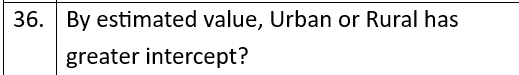

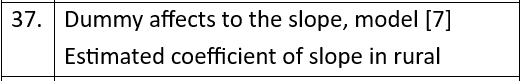

In [61]:
reg7<-lm(data=df,rice~income+I(d*income))
summary(reg7)


Call:
lm(formula = rice ~ income + I(d * income), data = df)

Residuals:
   Min     1Q Median     3Q    Max 
 -6732  -1621   -355   1300  19824 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.897e+03  2.528e+02  15.411  < 2e-16 ***
income         1.460e-02  2.045e-03   7.138 4.22e-12 ***
I(d * income) -9.206e-03  1.648e-03  -5.585 4.23e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2585 on 417 degrees of freedom
Multiple R-squared:  0.1116,	Adjusted R-squared:  0.1073 
F-statistic: 26.19 on 2 and 417 DF,  p-value: 1.926e-11


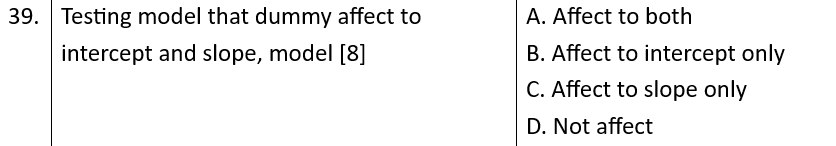

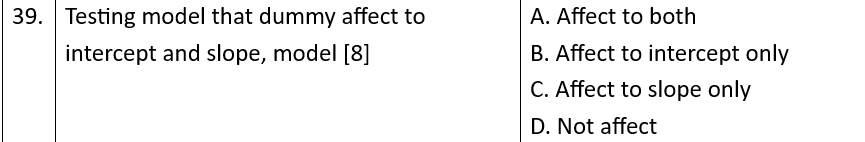

In [63]:
reg8<-lm(data=df,rice~ income + d + I(d*income))
summary(reg8)


Call:
lm(formula = rice ~ income + d + I(d * income), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6778.9 -1620.9  -366.6  1268.9 19747.3 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.733e+03  3.457e+02  10.800  < 2e-16 ***
income         1.564e-02  2.539e-03   6.162  1.7e-09 ***
d              3.524e+02  5.073e+02   0.695  0.48770    
I(d * income) -1.083e-02  2.867e-03  -3.779  0.00018 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2587 on 416 degrees of freedom
Multiple R-squared:  0.1126,	Adjusted R-squared:  0.1062 
F-statistic:  17.6 on 3 and 416 DF,  p-value: 8.95e-11


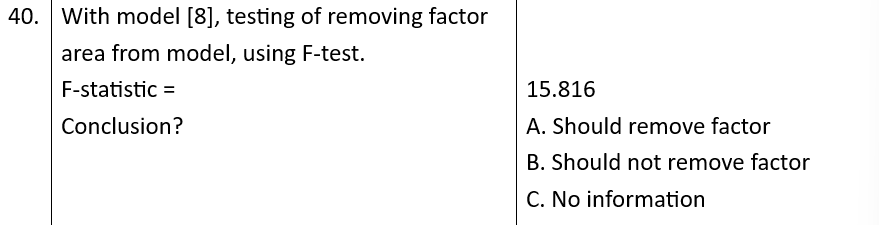

In [65]:
reg9<-lm(data=df,rice~ income + d + d*income)
summary(reg9)


Call:
lm(formula = rice ~ income + d + d * income, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6778.9 -1620.9  -366.6  1268.9 19747.3 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.733e+03  3.457e+02  10.800  < 2e-16 ***
income       1.564e-02  2.539e-03   6.162  1.7e-09 ***
d            3.524e+02  5.073e+02   0.695  0.48770    
income:d    -1.083e-02  2.867e-03  -3.779  0.00018 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2587 on 416 degrees of freedom
Multiple R-squared:  0.1126,	Adjusted R-squared:  0.1062 
F-statistic:  17.6 on 3 and 416 DF,  p-value: 8.95e-11
